In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("/content/AirQuality.csv", sep=';')
df = df.dropna(how='all')
df = df.iloc[:, :-2]

In [13]:
df.replace(-200, np.nan, inplace=True)

In [14]:
df.dropna(subset=['CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], inplace=True)

In [15]:
features = ['CO(GT)', 'T', 'RH', 'AH']
target = 'NO2(GT)'

In [16]:
X = df[features]
y = df[target]

In [19]:
for col in ['CO(GT)', 'T', 'RH', 'AH', 'NO2(GT)']:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
df.dropna(subset=['CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], inplace=True)

In [22]:
features = ['CO(GT)', 'T', 'RH', 'AH']
target = 'NO2(GT)'
X = df[features]
y = df[target]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression
R2 Score: 0.10436297257916272
MAE: 34.79659497199979
RMSE: 44.2142538846345

Decision Tree
R2 Score: 0.47111863052003533
MAE: 24.06163823215022
RMSE: 33.97624777378442

Random Forest
R2 Score: 0.6997320595354566
MAE: 18.66356095885599
RMSE: 25.60063651010402


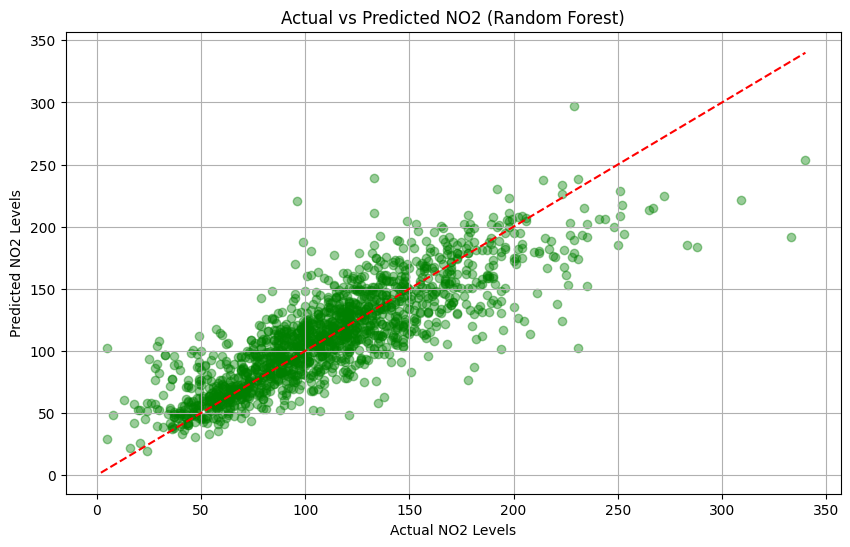

In [27]:
model = models["Random Forest"]
y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.xlabel("Actual NO2 Levels")
plt.ylabel("Predicted NO2 Levels")
plt.title("Actual vs Predicted NO2 (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid(True)
plt.show()